## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY

https://github.com/cdt59/MPPP


In [2]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt
from src.MPPP import *
# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
# import pandas as pd

%matplotlib inline

# time.sleep(20*60)

In [3]:
# Set input path to IMG files and search criteria

pre = ''
suf = 'references'


# Set input and output directories
# directory_input  = 'Z:/Mastcam-Z/agisoft/data'
# directory_output = 'Z:/Mastcam-Z/agisoft/images'

# Set input and output directories
# directory_input  = 'C:/Users/cdt59/Desktop/heli/data'
# directory_output = 'C:/Users/cdt59/Desktop/heli'

# Set input and output directories
# directory_input  = 'C:/Users/cdt59/Desktop/agisoft/data'
# directory_output = 'C:/Users/cdt59/Desktop/agisoft/images'

# directory_input  = 'C:/Users/cdt59/Downloads/Mars_2020_sol_681/data'
# directory_output = directory_input
# sol = 6

# Kai's testing input and output directory
directory_input  = './data/input/'
directory_output = './data/output/'

sol = '792'

pre = 'Z*0_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

# pre = 'N*F_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam'

# pre = '*M_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vce_ecam'

# pre = '*V0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vec'

# pre = 'H*_0'+str(sol)
# suf = 'refs_'+str(sol).zfill(3)+'_heli'


sequ_id = ''

path_input     = directory_input
IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
IMG_paths     += sorted( glob.glob(  directory_input + '/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 

if 'F_0' in pre or 'V' in pre or 'M' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    # IMG_paths += sorted( glob.glob(  directory_input + '/zcam/' +pre+'*_N*'+sequ_id+'*.IMG' ) )
    IMG_paths += sorted( glob.glob(  directory_input +pre+'*_N*'+sequ_id+'*.IMG' ) )


IMG_paths = IMG_paths[:]



print( f"Number of images: {len(IMG_paths)}")

# IMG_paths = ['C:/Users/cdt59/Desktop/agisoft/data\\NRF_0821_0739830363_020RAD_N0400132NCAM00709_0A0095J02.IMG']

# # remove duplicates in image set

# %run MPPP.py
remove_duplicate_IMGs( IMG_paths )

Number of images: 540
270
keeping   ZL0_0792_0737256757_831RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZR0_0792_0737263157_771RAD_N0390926ZCAM01023_034050A01.IMG
keeping   ZR0_0792_0737257666_848RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZR0_0792_0737258054_863RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZL0_0792_0737257076_848RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZL0_0792_0737263378_769RAD_N0390926ZCAM01023_034050A01.IMG
keeping   ZR0_0792_0737256709_831RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZL0_0792_0737256613_831RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZL0_0792_0737257746_848RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZL0_0792_0737256794_848RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZR0_0792_0737250256_848RAD_N0390926ZCAM03014_048085A01.IMG
keeping   ZR0_0792_0737258333_832RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZL0_0792_0737256936_832RAD_N0390926ZCAM08817_1100LMA01.IMG
keeping   ZR0_0792_0737234994_081RAD_N0390926ZCAM01075_0340LMA01.IMG
keeping 

## Test on original

Runs the original image_list_process on the tests dataset to measure the time take

1 images

0 ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG
After create save directory
	Before image process
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
		After Padding Image
ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG failed to process! 

saved ./data/output//sols_0700-0799_sci/failed_refs_792_zcam_20230903-182117.txt
saved ./data/output//sols_0700-0799_sci/positions_refs_792_zcam_20230903-182117.txt
total time take: 0.6959s


C:\Users\ongyi\anaconda3\envs\MPPP\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ongyi\anaconda3\envs\MPPP\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\ongyi\anaconda3\envs\MPPP\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


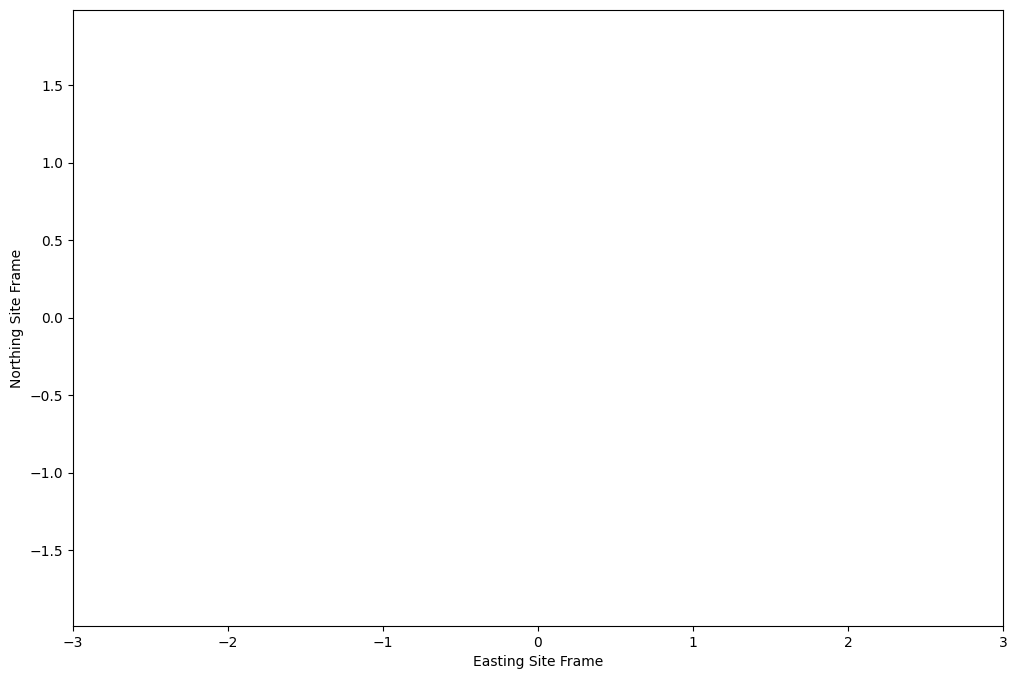

In [1]:
from src.MPPP import *

directory_output = './data/output/'
IMG_paths = [
    "./data/input/ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG"
 #    './data/input\\ZL0_0792_0737249488_988RAD_N0390926ZCAM08816_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737249614_035RAD_N0390926ZCAM03655_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737249844_113RAD_N0390926ZCAM03656_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737250256_848RAD_N0390926ZCAM03014_048085A01.IMG',
 # './data/input\\ZL0_0792_0737256482_832RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256530_848RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256548_864RAD_N0390926ZCAM08817_1100LMA02.IMG',
 # './data/input\\ZL0_0792_0737256562_848RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256575_831RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256589_848RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256601_831RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256613_831RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256628_832RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256641_848RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256655_848RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256669_832RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256683_848RAD_N0390926ZCAM08817_1100LMA01.IMG',
 # './data/input\\ZL0_0792_0737256695_848RAD_N0390926ZCAM08817_1100LMA01.IMG'
]
sol = '792'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

start = time.time()
image_list_process(IMG_paths[:1], directory_output, suf, find_offsets_mode=0)
end = time.time()

print(f"total time take: {end-start:.4f}s")

In [ ]:
%%time

# time.sleep(1000)

%run MPPP.py

# image_list_process( IMG_paths[::-1], directory_output, suf, find_offsets_mode = 1 )
image_list_process( IMG_paths[:], directory_output, suf, find_offsets_mode = 0 )

In [22]:
IMG_paths[-1]

'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG'

In [96]:
%run MPPP.py

# im = image( 'C:/Users/cdt59/Desktop/heli/data//HSF_0174_0682390593_685RAD_N0120001HELI00005_000085J02.IMG' ) # (70,40,2)
im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG', ) # (140,0,0)
# im = image( 'C:/Users/cdt59/Downloads/demo_Mars_2020_sol_681/demo_Mars_2020_sol_681/data/NRF_0681_0727406356_133RZS_N0321038NCAM12681_0A0195J01.IMG' )
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703534_098RAD_N0390926ZCAM08811_1100LMA01.IMG' ) 
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG' ) 
# im = image( IMG_paths[0]. )

im.image_reference()


im.f, im.b1, im.b2, im.cxp, im.cyp, im.k1, im.k2, im.theta_degrees, im.filename

(275.50336626574546,
 -0.14341427097264159,
 1.6860934191188369e-14,
 7.2050353729077301,
 9.6560820635000084,
 0.0010660000000000001,
 -0.00039800000000000002,
 -90.0,
 'HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG')

In [97]:
im.A

array([ 0.00256683, -0.0580188 ,  0.998312  ])

In [81]:

im.projection = 'frame'
cmod_xml = "<?xml version=\"1.0\" encoding=\"UTF-8\"?><calibration>\n  <projection>{}</projection>\n  <width>{}</width>\n  <height>{}</height>\n  <f>{}</f>\n  <cx>{}</cx>\n  <cy>{}</cy>\n  <k1>{}</k1>\n  <k2>{}</k2>\n  <b1>{}</b1>\n  <b2>{}</b2>\n</calibration>"\
            .format( im.projection, im.w, im.h, im.f, im.cxp, im.cyp, im.k1, im.k2, im.b1, im.b2 )

print(cmod_xml)

cmod_save_path = 'C:/Users/cdt59/Documents/MPPP_workspace/cmods/M2020_ZR0_034mm.xml'
with open(cmod_save_path, "w") as text_file:
    text_file.write( cmod_xml )

<?xml version="1.0" encoding="UTF-8"?><calibration>
  <projection>frame</projection>
  <width>1648</width>
  <height>1200</height>
  <f>4700.754501939136</f>
  <cx>-88.98545385</cx>
  <cy>46.10949642679975</cy>
  <k1>-0.470639</k1>
  <k2>0.528572</k2>
  <b1>-5.473207924448616</b1>
  <b2>9.058190362634296</b2>
</calibration>


In [174]:
w,h = [640,480]

# fisheye
im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG', ) # (140,0,0)
Xp,Yp,Zp,yp,pp,rp = [-482.863524,-649.370648,10.150207,162.253878,-5.142142,-9.563955]

# im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390575_302RAD_N0120001HELI02756_0000LUJ02.IMG', ) # (140,0,0)
# Xp,Yp,Zp,yp,pp,rp = [-479.242935,-648.062762,10.033978,161.940305,-9.974779,-10.268652] 

f, cxp, cyp, k1, k2, b1, b2 = [275.5,2.2541485333336087,11.026877077021922,-0.0086719433263928569,0.0031444070599917777,0,0]


In [176]:
im.image_reference()

ypr = np.array([yp,pp,rp])
R_site2cam = find_R_from_ypr( ypr )
# R_cam2ned  = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )

R_cam2site = R_cam2ned.inv() * R_site2cam #R_veh2cam * R_veh2site.inv()

C = [ Yp, Xp, -Zp ]

cx = cxp+w/2
cy = cyp+h/2

K_cam = np.array([
            [ f+b1, b2, cx ],
            [    0,  f, cy ],
            [    0,  0,b 1 ], ])

HVA = np.matmul( K_cam, R_cam2site.as_matrix() )
H = HVA[0,:]
V = HVA[1,:]
A = HVA[2,:]
O = A
Ra = np.array([0,k1,k2])
E = np.array([0.0,0.0,0.0])

hp = ( H - cx* A ) / f
vp = ( V - cy* A ) / f

GEOMETRIC_CAMERA_MODEL = im.label['GEOMETRIC_CAMERA_MODEL']
GEOMETRIC_CAMERA_MODEL['REFERENCE_COORD_SYSTEM_NAME']  = 'SITE_FRAME'
GEOMETRIC_CAMERA_MODEL['REFERENCE_COORD_SYSTEM_INDEX'] = '3'

GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_1'] = list( C )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_2'] = list( A )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_3'] = list( H )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_4'] = list( V )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_5'] = list( O )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_6'] = list( Ra )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_Y'] = list( E )

print( im.filename)

text = [im.filename, C[0], C[1], C[2], A[0], A[1], A[2],  H[0], H[1], H[2], V[0], V[1], V[2], O[0], O[1], O[2], Ra[0], Ra[1], Ra[2], E[0], E[1], E[2], ]

np.savetxt( im.filename[:-4]+'.cmod', text[:], delimiter=',', fmt='%s ' )

HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG


In [177]:
GEOMETRIC_CAMERA_MODEL

PVLGroup([
  ('CALIBRATION_SOURCE_ID', 'SYNTHETIC')
  ('MODEL_TYPE', 'CAHVORE')
  ('MODEL_COMPONENT_ID', ['C', 'A', 'H', 'V', 'O', 'R', 'E'])
  ('MODEL_COMPONENT_NAME',
   ['CENTER', 'AXIS', 'HORIZONTAL', 'VERTICAL', 'OPTICAL', 'RADIAL', 'ENTRANCE'])
  ('MODEL_COMPONENT_UNIT',
   ['METER', 'N/A', 'PIXEL', 'PIXEL', 'N/A', 'N/A', 'N/A'])
  ('MODEL_COMPONENT_1', [-649.370648, -482.863524, -10.150207])
  ('MODEL_COMPONENT_2',
   [0.033533630991549102, -0.18518103963683868, 0.98213210829884889])
  ('MODEL_COMPONENT_3',
   [-75.906206915999221, -317.16858979776362, 270.90647767129389])
  ('MODEL_COMPONENT_4',
   [269.75255526958802, -130.11981896074033, 221.84935125934959])
  ('MODEL_COMPONENT_5',
   [0.033533630991549102, -0.18518103963683868, 0.98213210829884889])
  ('MODEL_COMPONENT_6', [0.0, -0.0086719433263928569, 0.0031444070599917777])
  ('MODEL_COMPONENT_7', [0.0, 0.0, 0.0])
  ('MODEL_COMPONENT_8', 3.0)
  ('MODEL_COMPONENT_9', 0.0)
  ('MODEL_TRANSFORM_VECTOR', [0.0, 0.0, -0.26575])
 

In [343]:
%run MPPP.py

def find_quat_cam( image_name ):
    
    im = image( image_name ) 

    cahvor = np.array( [im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_1'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_2'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_3'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_4'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_5'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_6'],
                      ], dtype=np.float64 )

    hs    = norm( np.cross( cahvor[2], cahvor[1]) )
    vs    = norm( np.cross( cahvor[3], cahvor[1]) )
    hc    = np.dot( cahvor[2], cahvor[1] ) 
    vc    = np.dot( cahvor[3], cahvor[1] ) 

    hp    = ( cahvor[2] - hc* cahvor[1] ) / hs
    vp    = ( cahvor[3] - vc* cahvor[1] ) / vs

    theta   = np.arcsin( ( -norm( np.cross( vp, hp ) )/norm( vp )/norm( hp )) )

    K_cahv  = np.array([
                [ -hs*np.sin(theta), hs*np.cos(theta), hc ],
                [  0,                vs              , vc ],
                [  0,                0               ,  1 ], ])
    Ki_cahv = inv( K_cahv )

    R_cahv  = np.matmul( Ki_cahv, np.array( [ cahvor[2], cahvor[3], cahvor[1] ] ) )
    Ri_cahv = inv( R_cahv )

    cxp, cyp = [ hc-640/2, vc-480/2 ]

    k1 = cahvor[5][1]*1
    k2 = cahvor[5][2]*1

    # hs, vs, cxp, cyp, k1, k2,

    q_cam = R.from_matrix( R_cahv )

    return q_cam

directory_input  = 'C:/Users/cdt59/Downloads/demo_Mars_2020_sol_681/demo_Mars_2020_sol_681/data'

IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +'*_N*'+'*.IMG' ) )


q_cams = []
q_rots = []


q_ned2enu = R.from_matrix( [[0,1,0],[1,0,0],[0,0,-1]] )


      
for i in range(len(IMG_paths))[::4]:
    
    q_cam = find_quat_cam( IMG_paths [i]) 
    q_cams.append( q_cam )
    
    im = image(  IMG_paths [i] )
    
    q = im.label['ROVER_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION']
    q = [ q[1], q[2], q[3], q[0]]
    q_veh = R.from_quat( q )

    
    print( np.round(( q_cam * q_ned2enu * q_veh ).as_euler('zyx',degrees=1)), np.round(rots[i]) )


[-170.    1.  120.] [ 190.   60.    0.]
[ 119.    1.  121.] [ 118.   60.    0.]
[ -98.    0.  119.] [ 262.   60.    0.]
[ -56.   -0.  101.] [ 304.   79.    0.]
[ 150.    0.  103.] [ 150.   77.    0.]


In [492]:
%run MPPP.py

def cahvor2photogrammetry_Di_Li_2004( GEOMETRIC_CAMERA_MODEL ):
    
    # find_quat_cam( im.label['GEOMETRIC_CAMERA_MODEL'] )

    def cmod_from_cahvor( self, GEOMETRIC_CAMERA_MODEL ):

            
        self.C  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_1'], dtype=np.float64 )
        self.A  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_2'], dtype=np.float64 )
        self.H  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_3'], dtype=np.float64 )
        self.V  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_4'], dtype=np.float64 )
        self.O  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_5'], dtype=np.float64 )
        self.R  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_6'], dtype=np.float64 )

        self.hs = norm( np.cross( self.H, self.A ) )
        self.vs = norm( np.cross( self.V, self.A ) )
        self.hc = np.dot( self.H, self.A ) 
        self.vc = np.dot( self.V, self.A ) 

        self.hp = ( self.H - self.hc* self.A ) / self.hs
        self.vp = ( self.V - self.vc* self.A ) / self.vs

        self.theta = np.arcsin( ( - norm( np.cross( self.vp, self.hp ) )
                                  / norm( self.vp )
                                  / norm( self.hp ) ) )

        self.K_cam = np.array([
                    [ -self.hs*np.sin(self.theta), self.hs*np.cos(self.theta), self.hc ],
                    [                           0,                    self.vs, self.vc ],
                    [                           0,                          0,       1 ], ])

        self.rot_cam = np.matmul( np.inv( self.K_cam ), 
                                  np.array( [ self.H, self.V, self.A ] ) )

        self.R_cam = R.from_matrix( self.rot_cam )

        self.k1 = self.R[1]
        self.k2 = self.R[2]
        self.k3 = 0

        self.p1 = 0
        self.p2 = 0



directory_input  = 'C:/Users/cdt59/Downloads/demo_Mars_2020_sol_681/demo_Mars_2020_sol_681/data'

IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +'*_N*'+'*.IMG' ) )


R_cams = []
R_rots = []


R_ned2enu = R.from_matrix( [[0,1,0],[1,0,0],[0,0,-1]] )

R_cam2ned = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )


      
for i in range(len(IMG_paths))[::3]:
    
    R_cam = find_quat_cam( IMG_paths [i]) 
    R_cams.append( R_cam )
    
    im = image(  IMG_paths [i] )
    
    q = im.label['ROVER_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION']
    q = [ q[1], q[2], q[3], q[0]]
    R_veh = R.from_quat( q )
    print( )
    
    print( 
#         np.round(( R_cam * R_ned2enu * R_veh ).as_euler('zxy',degrees=1),1), 
        np.round(( R_cam * R_veh.inv() * R_cam2ned ).as_euler('zxy',degrees=1),1), 
#         np.round(( q_ned2enu * q_cam * q_veh ).as_euler('zyx',degrees=1),1), 
#         np.round(( q_veh * q_cam2enu * q_cam ).as_euler('zyx',degrees=1),1), 
        np.round(rots[i],1),
        np.round(rots_est[i],1),
        np.round( cam_veh_2_ypr( R_cam, R_veh),1),'',np.round(np.array(rots_est[i])-np.array(cam_veh_2_ypr( R_cam, R_veh)),1)
    )


def cam_veh_2_ypr( R_cam, R_veh ):
    
    R_cam2ned = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )    
    angles = ( R_cam * R_veh.inv() * R_cam2ned ).as_euler( 'zxy',degrees=1 )    
    return np.array([ ( - angles[0] ) % 360, - angles[1], angles[2] ])

def ypr_veh_2_cam( ypr, R_veh ):
    
    R_cam2ned = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] ) 
    angles = [ -ypr[0], -ypr[1], ypr[2] ]
    return R.from_euler( 'zxy', angles, degrees=1 ) * R_cam2ned.inv() * R_veh
    
ypr = cam_veh_2_ypr( R_cam, R_veh )
R_camp = ypr_veh_2_cam( ypr, R_veh )

R_cam.as_rotvec(degrees=1) - R_camp.as_rotvec(degrees=1)


[ 170.6  -59.4   -0.9] [ 189.6   59.9    0. ] [ 189.4   59.4   -0.7] [ 189.4   59.4   -0.9]  [ 0.  -0.1  0.2]

[-48.  -59.2   1. ] [ 46.   59.7   0. ] [ 48.   59.2   1.2] [ 48.   59.2   1. ]  [-0.  -0.1  0.2]

[-17.1 -78.5   0.9] [ 15.4  78.9   0. ] [ 17.   78.4   1. ] [ 17.1  78.5   0.9]  [-0.1 -0.1  0. ]

[ 26.5 -59.6  -0.9] [ 334.2   60.2    0. ] [ 333.5   59.6   -0.9] [ 333.5   59.6   -0.9]  [-0.  -0.   0.1]

[ 60.1 -78.5  -4. ] [ 303.6   79.1    0. ] [ 299.7   78.5   -4. ] [ 299.9   78.5   -4. ]  [-0.1 -0.  -0. ]

[-167.   -77.4   -2.7] [ 169.2   77.     0. ] [ 167.2   76.8   -2.4] [ 167.    77.4   -2.7]  [ 0.2 -0.6  0.3]


In [487]:
ypr, R.from_euler( 'zxy', ypr, degrees=1 ).as_euler( 'zxy',degrees=1 )  

([166.97457010692773, 77.441774296512975, -2.7128127945315361],
 array([ 166.97457011,   77.4417743 ,   -2.71281279]))

In [ ]:
[-170.    0.  121.] [ 190.   60.    0.]
[ 119.   -1.  121.] [ 118.   60.    0.]
[ -98.    1.  120.] [ 262.   60.    0.]
[ -56.    1.  101.] [ 304.   79.    0.]
[ 150.   -1.  104.] [ 150.   77.    0.]

In [444]:
rots= [
[189.65,	59.9,0],
[261.82	,60.02,0],
[333.83	,59.98,0],
[46.01,	59.7,0],
[117.64	,59.89,0],
[303.26	,78.92,0],
[15.43	,78.94,0],
[189.99	,60.11,0],
[262.16	,60.23,0],
[334.17	,60.19,0],
[46.36,	59.9,0],
[117.99	,60.09,0],
[303.57	,79.13,0],
[15.74	,79.15,0],
[152.85	,77.01,0],
[169.15	,76.95,0],
[150.46,	77.2,0],
[166.76	,77.13,0],
]
rots_est = [
[189.400513,	59.371518,	-0.703836],
[259.998017,	59.463940,	-2.077667],
[333.388496,	59.439321,	-0.894630],
[47.9583730,	59.155555,	1.1738150],
[119.693799,	59.365431,	1.3010680],
[299.389114,	78.357353,	-4.312049],
[16.9638570,	78.401259,	0.9805770],
[189.500359,	59.508122,	-0.685157],
[260.111964,	59.605751,	-2.043629],
[333.500606,	59.584617,	-0.864718],
[48.1147770,	59.305393,	1.2359390],
[119.832181,	59.510558,	1.3295250],
[299.744111,	78.496317,	-4.027788],
[17.2673580,	78.556619,	1.2369350],
[152.151878,	76.897309,	-1.216484],
[167.174854,	76.820812,	-2.439517],
[154.744418,	76.699157,	3.9788250],
[169.772341,	76.635643,	2.7573490],
]

rots_est_ = [
[189.575103,	59.341445,	-0.568371],
[260.208519,	59.31446 ,	-1.931865],
[333.291376,	59.252065,	-1.078526],
[47.798095 ,	59.082518,	0.926741 ],
[119.698948,	59.358233,	1.253662 ],
[299.778112,	78.131351,	-3.963961],
[16.093391 ,	78.221552,	0.042631 ],
[189.62579 ,	60.177921,	-0.607367],
[260.36672 ,	60.153744,	-1.854743],
[333.464651,	60.101101,	-0.964275],
[48.1625   ,	59.943258,	1.200726 ],
[119.718057	,60.20794  ,	1.15542  ],
[300.003766,	79.016264,	-3.864333],
[16.687099 ,	79.180346,	0.595529 ],
[152.192651,	76.838055,	-1.027022],
[167.128715,	76.763846,	-2.326082],
[154.779602,	76.644959,	3.985994 ],
[169.720814,	76.584551,	2.688564 ],]


qts = [ qs[i] * R.from_euler('zyx',rots[i],degrees=1).inv() for i in range(len(IMG_paths)) ]

for i in range(len(IMG_paths)):
    print( np.round(qts[i].as_rotvec(degrees=1)))

[-19. -19.  74.]
[-88. -89. -45.]
[  31.   29.  108.]
[-59. -60.  20.]
[  88.   88.  116.]
[ 82.  81.  83.]
[-30. -32.  78.]
[-20. -19.  74.]
[-89. -89. -45.]
[  31.   29.  108.]
[-60. -61.  20.]
[  88.   88.  116.]
[ 82.  81.  82.]
[-30. -32.  78.]
[ 33.  36.  95.]
[  8.  10.  93.]
[ 40.  39.  94.]
[ 14.  14.  93.]


In [265]:
q_cam = R.from_matrix( R_cahv )

# q_cahv = R.from_matrix( [[1,0,0],[0,1,0],[0,0,1]] )



# q_cam2rpy = R.from_matrix( [[-1,0,0],[0,-1,0],[0,0,1]] )
q_cam2rpy = R.from_matrix( [[0,0,1],[1,0,0],[0,1,0]] )




# q = im.label['HELI_M_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION'].copy()
# im.q_M = R.from_quat( [ q[1], q[2], q[3], q[0]] )

# q = im.label['HELI_G_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION'].copy()
# im.q_G = R.from_quat( [ q[1], q[2], q[3], q[0]] )


# im.q_T = q_cam * im.q_G * im.q_M  * q_cam2enu *  q_ned2enu


im.q_T = q_cam * q_cam2rpy.inv()


im.ypr = im.q_T.as_euler('zyx', degrees=True)

im.ypr

array([ 78.15561375, -46.91299754,  90.21532491])

In [263]:
aim = R.from_euler('zyx', (303,80,-4), degrees=True)

q = q_cam * aim.inv()
q.as_rotvec(degrees=1), q.as_matrix()

(array([ 85.46743662,  84.50928645,  79.2275697 ]),
 array([[-0.17108118,  0.30651506,  0.93636518],
        [ 0.95417273, -0.1852945 ,  0.2349901 ],
        [ 0.24553132,  0.9336565 , -0.26076791]]))

In [16]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

NameError: name 'rmcs' is not defined

In [186]:
q_T_aim = R.from_euler( 'zyx', (70,38,4),degrees=True )

q_cam2enu = q_T_aim.inv() *q_cam * im.q_G * im.q_M *q_ned2enu

q_cam2enu.as_rotvec(degrees=1)

array([ -13.95403568, -122.26286237,   67.64833285])

In [3]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           ''+'\t',''+'\t',''+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )

821 	 40 	 132 	 	 	 	 -4649.131 	 2273.826 	 149.121 	
821 	 40 	 70 	 	 	 	 -4644.041 	 2275.221 	 148.731 	
818 	 40 	 0 	 	 	 	 -4649.281 	 2276.728 	 148.901 	
818 	 39 	 1550 	 	 	 	 -4648.226 	 2283.74 	 148.704 	
816 	 39 	 1418 	 	 	 	 -4629.225 	 2300.703 	 147.718 	
816 	 39 	 1294 	 	 	 	 -4625.095 	 2277.624 	 147.133 	
797 	 39 	 1170 	 	 	 	 -4625.436 	 2254.732 	 148.838 	
795 	 39 	 1112 	 	 	 	 -4623.796 	 2253.281 	 148.705 	
793 	 39 	 1036 	 	 	 	 -4622.209 	 2248.958 	 148.201 	
784 	 39 	 926 	 	 	 	 -4624.55 	 2258.333 	 148.341 	
784 	 39 	 858 	 	 	 	 -4621.025 	 2262.479 	 147.291 	
775 	 39 	 690 	 	 	 	 -4603.626 	 2269.34 	 146.063 	
770 	 39 	 650 	 	 	 	 -4603.363 	 2270.358 	 146.078 	
768 	 39 	 0 	 	 	 	 -4598.009 	 2171.894 	 148.587 	
766 	 38 	 2208 	 	 	 	 -4588.678 	 2090.374 	 150.016 	
766 	 38 	 2102 	 	 	 	 -4589.52 	 2088.131 	 149.977 	
765 	 38 	 1808 	 	 	 	 -4575.314 	 2041.085 	 149.421 	
764 	 38 	 944 	 	 	 	 -4473.221 	 1919.66 	 149

In [29]:
data['features'][-1]

{'type': 'Feature',
 'properties': {'RMC': '40_132',
  'site': 40,
  'drive': 132,
  'sol': 821,
  'easting': 4349844.955,
  'northing': 1095573.521,
  'elev_geoid': -2420.788818,
  'elev_radii': -4108.919434,
  'radius': 3392081.08,
  'lon': 77.36819431,
  'lat': 18.48298797,
  'roll': 8.657,
  'pitch': 4.009,
  'yaw': -106.695,
  'yaw_rad': -1.8622,
  'tilt': 9.534,
  'dist_m': 10.97,
  'dist_total_m': 18718.678,
  'dist_km': 18.72,
  'dist_mi': 11.63,
  'final': 'y',
  'Note': 'Used Mobility Report WID 48211',
  'images': [{'name': 'Panorama',
    'isPanoramic': True,
    'url': 'Layers/mosaics/N_LRGB_0821_RZS_0400132_CYL_L_AUTOGENJ01.jpg',
    'rows': '2247',
    'columns': '9292',
    'azmin': '0',
    'azmax': '360',
    'elmin': '-69.3863',
    'elmax': '17.6854',
    'elzero': '457.492'}]},
 'geometry': {'type': 'Point',
  'coordinates': [77.36819431, 18.48298797, -2420.788818]}}